### Reviewing imputation methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Set the plotting style.
sns.set_style("whitegrid")

In [2]:
df = pd.DataFrame({
    'x1': [2.1, 3.2, 4.1, 1.15, 5.05, 6.1, 7.2, 8.1, np.nan],
    'x2': [6.45, 9.6, 10.4, 5.9, 12.6, 16.33, 18.6, 20.3, 19.5]
})

In [17]:
df

,x1,x2
0,2.10,6.45
1,3.20,9.60
2,4.10,10.40
3,1.15,5.90
4,5.05,12.60
5,6.10,16.33
6,7.20,18.60
7,8.10,20.30
8,NaN,19.50


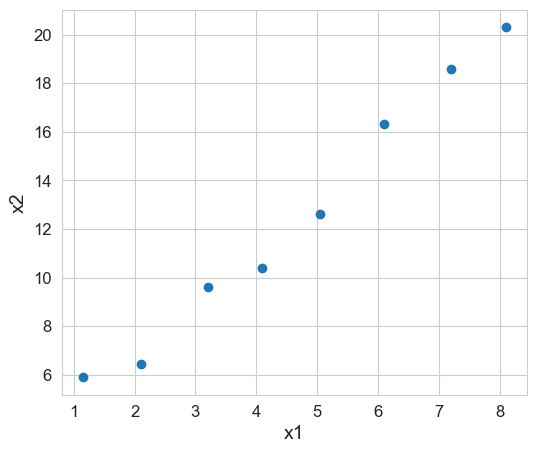

In [10]:
plt.figure(figsize = (6, 5))
plt.scatter(df['x1'], df['x2'])
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

### One method we can use to replace missing value is through mean imputation
- We can use .fillna() to replace NaN with the mean value in the column
- We can then plot that new data and compare it with the original

In [11]:
df_mean = df.fillna(df.mean())

In [39]:
### Plotting for mean

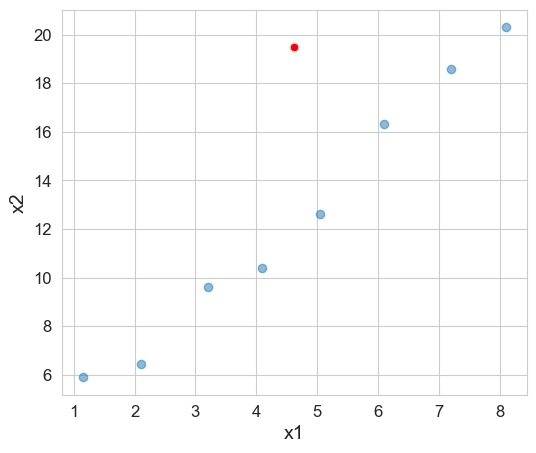

In [19]:
plt.figure(figsize = (6, 5))
plt.scatter(df_mean['x1'], df_mean['x2'], alpha=0.5)

sns.scatterplot(data=df_mean[df['x1'].isna()], x='x1', y='x2', color='r')

plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

In [16]:
df_mean

,x1,x2
0,2.100,6.45
1,3.200,9.60
2,4.100,10.40
3,1.150,5.90
4,5.050,12.60
5,6.100,16.33
6,7.200,18.60
7,8.100,20.30
8,4.625,19.50


### Median imputation
- We can use .fillna() to replace NaN with the median value in the column
- We can then plot that new data and compare it with the original

In [21]:
df_median = df.fillna(df.median())
df_median

,x1,x2
0,2.100,6.45
1,3.200,9.60
2,4.100,10.40
3,1.150,5.90
4,5.050,12.60
5,6.100,16.33
6,7.200,18.60
7,8.100,20.30
8,4.575,19.50


In [ ]:
### Plotting for Median

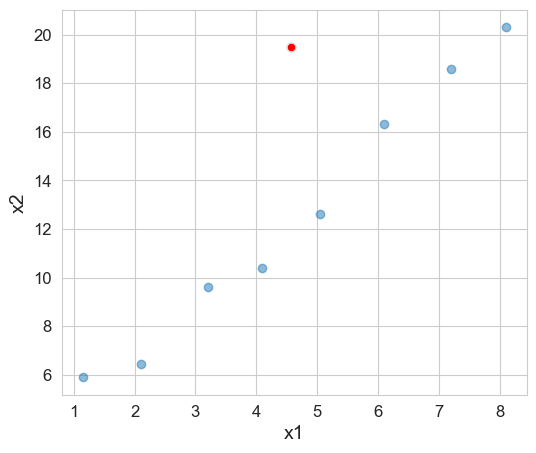

In [24]:
plt.figure(figsize = (6, 5))
plt.scatter(df_median['x1'], df_median['x2'], alpha=0.5)

sns.scatterplot(data=df_median[df['x1'].isna()], x='x1', y='x2', color='r')

plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

In [ ]:
### Mode imputation
- We can use .fillna() to replace NaN with the mode value in the column
- We can then plot that new data and compare it with the original

In [27]:
df_mode = df.fillna(df.mode().iloc[0])
df_mode

,x1,x2
0,2.10,6.45
1,3.20,9.60
2,4.10,10.40
3,1.15,5.90
4,5.05,12.60
5,6.10,16.33
6,7.20,18.60
7,8.10,20.30
8,1.15,19.50


In [ ]:
### Plotting for mode

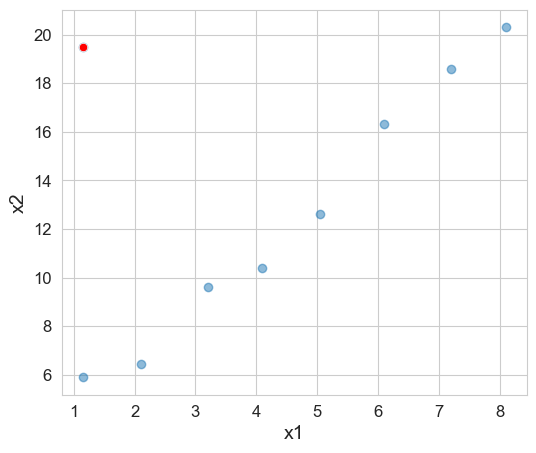

In [28]:
plt.figure(figsize = (6, 5))
plt.scatter(df_mode['x1'], df_mode['x2'], alpha=0.5)

sns.scatterplot(data=df_mode[df['x1'].isna()], x='x1', y='x2', color='r')

plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

### Because all of these examples are not good representations, we can try something different
- iterative imputer to fill missing values

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [32]:
imputer = IterativeImputer()

In [35]:
imputer.fit(df)

IterativeImputer()

In [37]:
df_iterative = imputer.transform(df)
df_iterative = pd.DataFrame(df_iterative, columns=df.columns)
df_iterative

,x1,x2
0,2.100000,6.45
1,3.200000,9.60
2,4.100000,10.40
3,1.150000,5.90
4,5.050000,12.60
5,6.100000,16.33
6,7.200000,18.60
7,8.100000,20.30
8,7.736131,19.50


In [ ]:
### Plotting for the iterative imputer

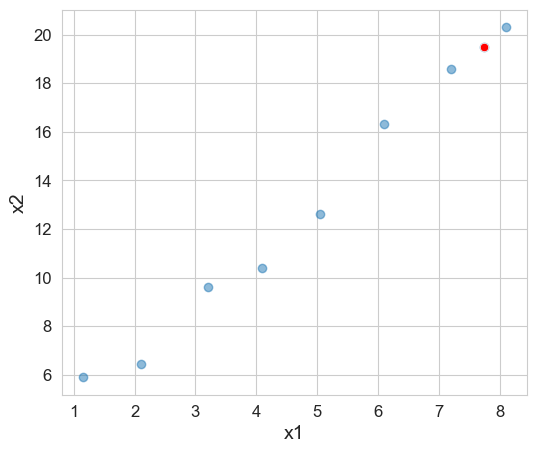

In [38]:
plt.figure(figsize = (6, 5))
plt.scatter(df_iterative['x1'], df_iterative['x2'], alpha=0.5)

sns.scatterplot(data=df_iterative[df['x1'].isna()], x='x1', y='x2', color='r')

plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

In [ ]:
This is more consistent with the data.
- But we will do better if we use a method that will make use of the relationships between the variables and not just replacing with mean, median, and mode.